### Details on how the M1M3 force balance system works

In [60]:
from M1M3tools import *
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.jet()

%matplotlib inline

### Fx, Fy, and Fz

In [2]:
#fx distribution (fxd) is the force set to counter net Fx, and so on
fxda = np.array(FX_DISTRIBUTION)
fxd = fxda[:, 0]
fyda = np.array(FY_DISTRIBUTION)
fyd = fyda[:, 1]
fzda = np.array(FZ_DISTRIBUTION)
fzd = fzda[:, 2]
print(sum(fxd), sum(fyd), sum(fzd))

0.999999996 1.0000000000000007 0.9999999997999999


Text(0.5, 1.0, 'Force distribution to remove 1N net Fz')

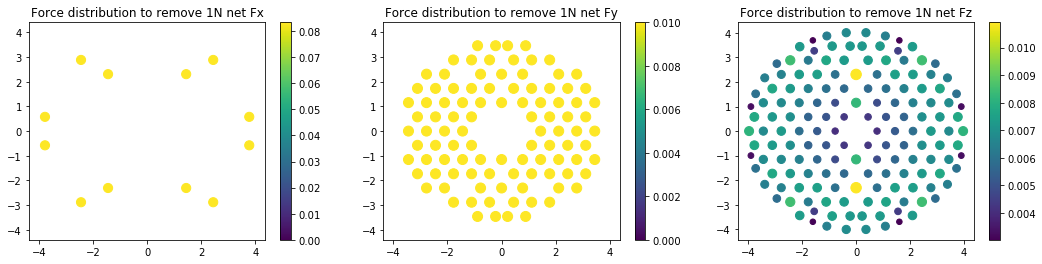

In [5]:
fig, ax = plt.subplots(1,3, figsize=(18,4))
img = ax[0].scatter(xact, yact, fxd*1000, fxd)
plt.colorbar(img, ax=ax[0])
img = ax[1].scatter(xact, yact, fyd*1e4, fyd)
plt.colorbar(img, ax=ax[1])
img = ax[2].scatter(xact, yact, fzd*1e4, fzd)
plt.colorbar(img, ax=ax[2])
#ax[0].axis('equal')
ax[0].set_title('Force distribution to remove 1N net Fx')
ax[1].set_title('Force distribution to remove 1N net Fy')
ax[2].set_title('Force distribution to remove 1N net Fz')

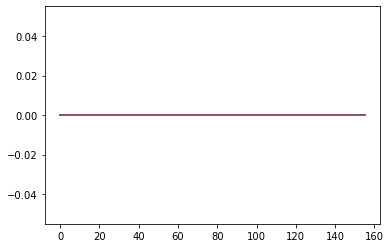

In [6]:
#check other components are zero
plt.plot(fxda[:,1])
plt.plot(fxda[:,2])
plt.plot(fyda[:,0])
plt.plot(fyda[:,2])
plt.plot(fzda[:,0])
plt.plot(fzda[:,1])

### The Fz distribution should look like zenith optimized forces. 
#### Let's use polishing forces from Buddy to check that

Text(0.5, 1.0, '2014 polishing forces from Buddy')

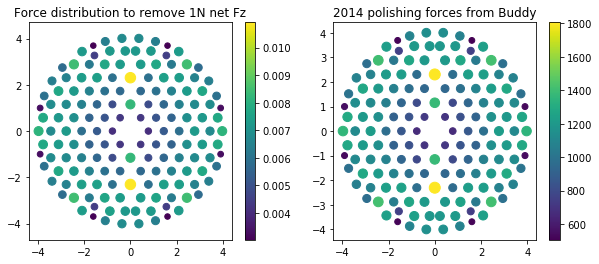

In [24]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
img = ax[0].scatter(xact, yact, fzd*10000, fzd)
fig.colorbar(img, ax=ax[0])
ax[0].axis('equal')
ax[0].set_title('Force distribution to remove 1N net Fz')
ax[0].axis('equal')

BuddyFile = 'data/MirrorLab2014Forces.xlsx'
df = pd.read_excel(BuddyFile)
BuddyForce = np.float64(df['net force'][1:])

# Buddy's actuator IDs are different, not in ascending order
BuddyActID = np.float64(df['actuator ID'][1:])
BuddyActX = np.float64(df['x'][1:])
BuddyActY = np.float64(df['y'][1:])

#get rid of the zeros in below Buddy's rows in the Excel
idx00 = ~np.isnan(BuddyForce) 
BuddyForce = BuddyForce[idx00]
BuddyActID = BuddyActID[idx00]
BuddyActX = BuddyActX[idx00]
BuddyActY = BuddyActY[idx00]

idxAs = np.argsort(BuddyActID)
actIDsorted = BuddyActID[idxAs]
BuddyForce = BuddyForce[idxAs]
xact = BuddyActX[idxAs]
yact = BuddyActY[idxAs]

img = ax[1].scatter(xact, yact, BuddyForce/15, BuddyForce)
fig.colorbar(img, ax=ax[1])
ax[1].set_title('2014 polishing forces from Buddy')

### Mx and My are normalized to 0.001 N * m

In [18]:
#mx distribution (mxd) is the force set to counter net Mx (x moment), and so on
mxd = np.array(MX_DISTRIBUTION)
mxdx = mxd[:, 0]
mxdy = mxd[:, 1]
mxd = mxd[:, 2]

myd = np.array(MY_DISTRIBUTION)
mydx = myd[:, 0]
mydy = myd[:,1]
myd = myd[:, 2]

#somehow these are normalized to provide 0.001 N*m of net moment
print(sum(mxd), sum(mxd*yact))
print(sum(myd), sum(-myd*xact)) #negative sign, because of right-hand rule

-2.39999998697959e-11 0.0009999826689530418
7.729999997166176e-11 0.0009999974033524021


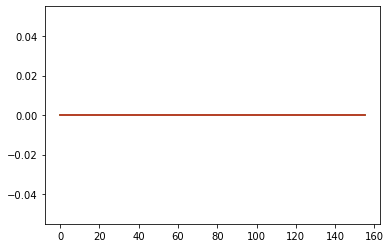

In [19]:
#check other components are zero
plt.plot(mxdx)
plt.plot(mxdy)
plt.plot(mydx)
plt.plot(mydy)

### Mx distribution is Fz with a linear slope

check that sum = 0, we have -0.00 N*m
check that moment = 0.001, we have 0.001
0.0 -1.187244464352702e-11
5.5378972e-06 5.536231248761308e-06


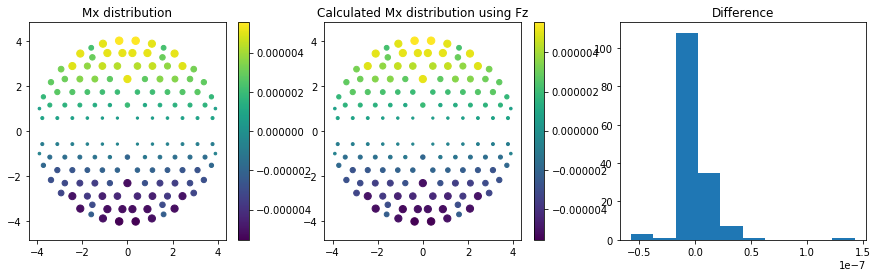

In [20]:
#let's see if we can reproduce mxd using fzd
mymxd = fzd*yact #assume an y=x slope, we will normalize later
mymxd = mymxd/(sum(mymxd*yact))*0.001 #weird, but mxd is normalized to 0.001 N*m
print('check that sum = 0, we have %.2f N*m'%sum(mymxd))
print('check that moment = 0.001, we have %.3f'%sum(mymxd*yact))

fig, ax = plt.subplots(1,3, figsize=(15,4))
img = ax[0].scatter(xact, yact, abs(mxd)*1e7, mxd)
fig.colorbar(img, ax=ax[0])
ax[0].axis('equal')
img = ax[1].scatter(xact, yact, abs(mxd)*1e7, mymxd)
fig.colorbar(img, ax=ax[1])
ax[1].axis('equal')
ax[2].hist(mxd - mymxd)
ax[0].set_title('Mx distribution')
ax[1].set_title('Calculated Mx distribution using Fz')
ax[2].set_title('Difference')
print(mxd[0], mymxd[0])
print(max(mxd), max(mymxd))

### My distribution is Fz with a linear slope

check that sum = 0, we have 0
check that moment = 0.001, we have -0.001
-6.482498e-07 -6.487359128018925e-07
6.571316e-06 6.57058725593853e-06


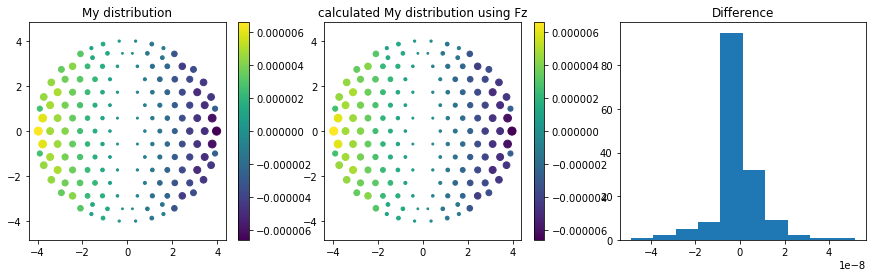

In [21]:
#let's see if we can reproduce myd using fzd
mymyd = fzd*xact #assume an y=x slope, we will normalize later
mymyd = -mymyd/(sum(mymyd*xact))*0.001 #weird, but myd is normalized to 0.001 N*m
print('check that sum = 0, we have %.0f'%sum(mymyd))
print('check that moment = 0.001, we have %.3f'%sum(mymyd*xact))
fig, ax = plt.subplots(1,3, figsize=(15,4))
img = ax[0].scatter(xact, yact, abs(myd)*1e7, myd)
fig.colorbar(img, ax=ax[0])
ax[0].axis('equal')
img = ax[1].scatter(xact, yact, abs(myd)*1e7, mymyd)
fig.colorbar(img, ax=ax[1])
ax[1].axis('equal')
ax[2].hist(myd - mymyd)
ax[0].set_title('My distribution')
ax[1].set_title('calculated My distribution using Fz')
ax[2].set_title('Difference')
print(myd[0], mymyd[0])
print(max(myd), max(mymyd))

### Mz is produced using x and y forces. Normalization is also at 0.001 N*m

1.999999999990833e-09 1.0000000000462384e-09 0.00099997155858


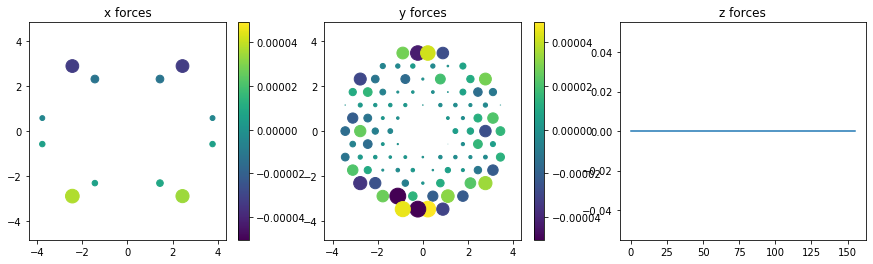

In [22]:
mzd = np.array(MZ_DISTRIBUTION)
mzdx = mzd[:, 0]
mzdy = mzd[:, 1]
fig, ax = plt.subplots(1,3, figsize=(15,4))
img = ax[0].scatter(xact, yact, abs(mzdx)*5e6, mzdx, vmin=np.min(mzdy), vmax=np.max(mzdy))
ax[0].axis('equal')
ax[0].set_title('x forces')
fig.colorbar(img, ax=ax[0])
img = ax[1].scatter(xact, yact, abs(mzdy)*5e6, mzdy,  vmin=np.min(mzdy), vmax=np.max(mzdy))
ax[1].axis('equal')
ax[1].set_title('y forces')
fig.colorbar(img, ax=ax[1])
ax[2].plot(mzd[:, 2])
ax[2].set_title('z forces')

print(sum(mzdx), sum(mzdy), sum(mzdy*xact)+sum(-mzdx*yact))

### Are the functions for calculating moments from forces and for distributing moments to forces self-consistent? NO

4/16/21: This was because the moments calculations were centeted on the CG. This makes it harder for the loop to converge, because, for example, attempting to add a net Fx would introduce addtional My that needs to be compensated. The better thing to do is to make Fx, Fy, Fz, Mx, My, Mz all independent. Changing the moments to be centered on the mirror backplate (actuator plane) solves that problem. I am asking Petr to make this update today.

In [25]:
dfc = pd.read_csv('data/forces_190125_Chris.csv')
appliedForces = dfc.appliedForces
balanceForces = dfc.balanceForces
staticForces = dfc.staticForces
bendingForces = dfc.bendingForces
initialOptimizedForces = dfc.initialOptimizedForces

# the fx,fy,fz,mx,my,mz created by balanceForces : These center on CG
fx, fy, fz, mx, my, mz = forcesMoments([0.0] * 12, [0.0] * 100, balanceForces)
print(fx,fy,fz,mx,my,mz)
# forces need to counter mx and my (the rest = 0)
xp, yp, zp = forceDistribution(0.0, 0.0, 0.0, mx, my, 0.0)
x, y, z = minimizeForces(xp, yp, zp) #this simply throws out the zeros, make len(x)=12, len(y)=100

0.0 0.0 -1379.4099999999992 -77.98531726908016 -487.90236928918006 0.0


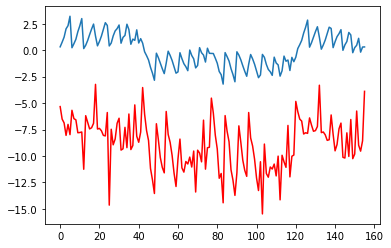

In [26]:
plt.plot(balanceForces, 'r')
plt.plot(z)

### A control test

4/16/21: same as above. Once we make the update, this is outdated. This was used to demonstrate the inefficiency of the control loop before.

iter#0: 100.0 0.0 0.0 0.0 -39.3 0.0
iter#1: 0.0 -0.0 0.0 -0.0 39.3 -0.0
iter#2: 0.0 0.0 -0.0 0.0 0.0 0.0


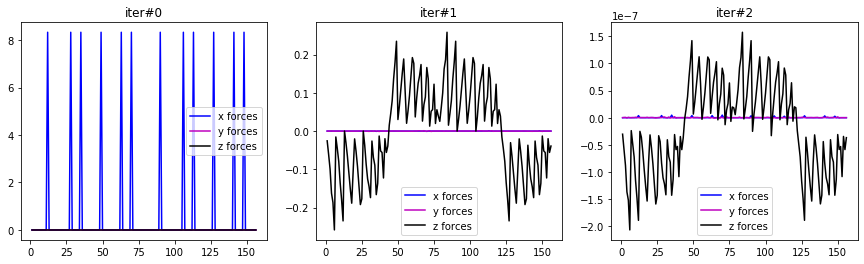

In [27]:
# a control test: we start from a net x-force. The sum of which is 100N. 
# We need to define the moments around the x and y axes that are in the actuator plane. 
# What is good about defining that around CG? 
# sure, when we change pointing, G doesn't introduce addtional moment. 
# But the forces need to change according to the LUT anyway. (because the actuators are rotating.)
# the bad thing about using CG is that, with this definition, fxd introduces My,
# right now, it doesn't introduce big problem, because
# My can be cancelled with myd. myd doesn't introduce fx,fy,fz,Mx,Mz
# Looks like at least we need to make forceDistribution() iterative 
# by itself. It should gives forces only after it converges.
x0 = np.arange(156)+1
txp = fxd*100
typ = [0.0]*156
tzp = [0.0]*156
fig, ax = plt.subplots(1,3 , figsize=(15,4))
for i in range(3):
    ax[i].plot(x0, txp, 'b', label='x forces')
    ax[i].plot(x0, typ, 'm', label='y forces') 
    ax[i].plot(x0, tzp, 'k', label='z forces')
    ax[i].legend()
    ax[i].set_title('iter#%d'%i)

    xi, yi, zi = minimizeForces(txp, typ, tzp)
    fx, fy, fz, mx, my, mz = forcesMoments(xi, yi, zi) #fxd[fxd!=0])
    print('iter#%d: %.1f %.1f %.1f %.1f %.1f %.1f'%(i, fx, fy, fz, mx, my, mz))
    tx, ty, tz = forceDistribution(-fx, -fy, -fz, -mx, -my, -mz)
    #tx, ty, tz = forceDistribution(fx, fy, fz, 0, 0 ,0)
    txp = addForces(txp, tx)
    typ = addForces(typ, ty) #do NOT do typ += ty (which is list concatenation)
    tzp = addForces(tzp, tz)
#as we can see, in this example, there is a overshoot in My after iter#1. That is because we use fxd to counter fx, 
#then use myd (z forces) to counter My, which has already been countered with fxd
# after that, we continue to correct My, using myd (z forces). myd only introduces My, nothing else.

### The below is what has been used in the control system so far (as of 4/16/21)

We are looking at two versions: 1. Felipe sent over email 2. github

In [37]:
FelipeFile = 'data/old_FB_distrib/Feedback Force Distribution.xlsx'
df = pd.read_excel(FelipeFile)
FelipeDist = np.array(df)

In [44]:
fx = pd.read_csv('data/old_FB_distrib/ForceDistributionXTable.csv')
fy = pd.read_csv('data/old_FB_distrib/ForceDistributionYTable.csv')
fz = pd.read_csv('data/old_FB_distrib/ForceDistributionZTable.csv')
mx = pd.read_csv('data/old_FB_distrib/MomentDistributionXTable.csv')
my = pd.read_csv('data/old_FB_distrib/MomentDistributionYTable.csv')
mz = pd.read_csv('data/old_FB_distrib/MomentDistributionZTable.csv')

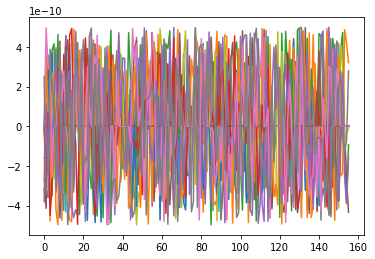

In [49]:
plt.plot(fx['X']-FelipeDist[:,0])
plt.plot(fx['Y']-FelipeDist[:,1])
plt.plot(fx['Z']-FelipeDist[:,2])
plt.plot(fy['X']-FelipeDist[:,3])
plt.plot(fy['Y']-FelipeDist[:,4])
plt.plot(fy['Z']-FelipeDist[:,5])
plt.plot(fz['X']-FelipeDist[:,6])
plt.plot(fz['Y']-FelipeDist[:,7])
plt.plot(fz['Z']-FelipeDist[:,8])

plt.plot(mx['X']-FelipeDist[:,9])
plt.plot(mx['Y']-FelipeDist[:,10])
plt.plot(mx['Z']-FelipeDist[:,11])
plt.plot(my['X']-FelipeDist[:,12])
plt.plot(my['Y']-FelipeDist[:,13])
plt.plot(my['Z']-FelipeDist[:,14])
plt.plot(mz['X']-FelipeDist[:,15])
plt.plot(mz['Y']-FelipeDist[:,16])
plt.plot(mz['Z']-FelipeDist[:,17])

fx, sum_x = +1.00, sum_y = +0.00, sum_z = +0.00   mx = +0.00, my=+0.39, mz=-0.00
fy, sum_x = -0.00, sum_y = +1.00, sum_z = +0.00   mx = -0.39, my=+0.00, mz=-0.00
fz, sum_x = +0.00, sum_y = +0.00, sum_z = +1.00   mx = +0.00, my=+0.00, mz=+0.00
mx, sum_x = -0.00, sum_y = -0.00, sum_z = +0.00   mx = +0.00, my=+0.00, mz=+0.00
my, sum_x = -0.00, sum_y = -0.00, sum_z = -0.00   mx = -0.00, my=+0.00, mz=-0.00
mz, sum_x = +0.00, sum_y = +0.00, sum_z = -0.00   mx = +0.00, my=+0.00, mz=+0.00


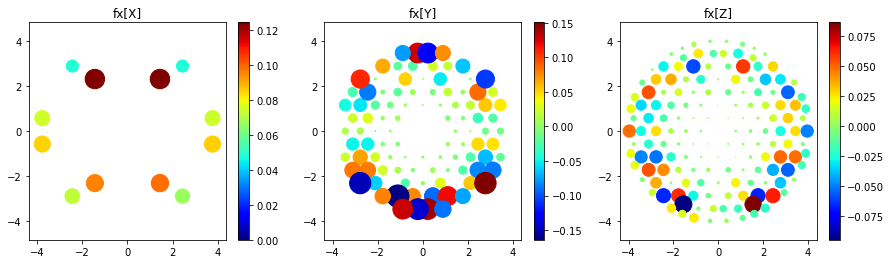

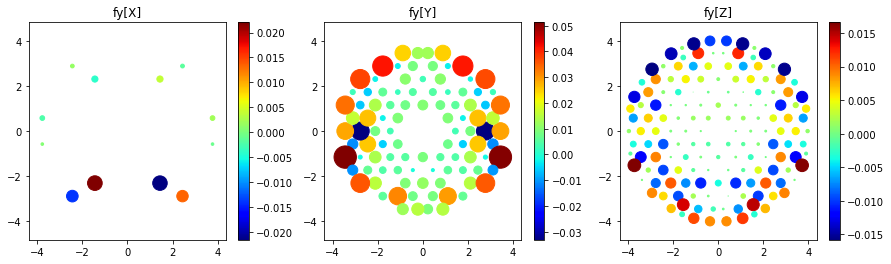

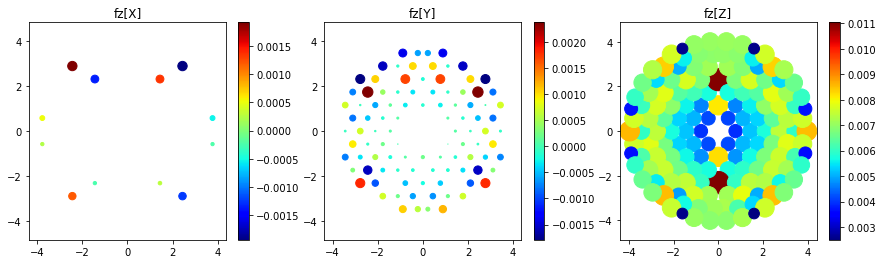

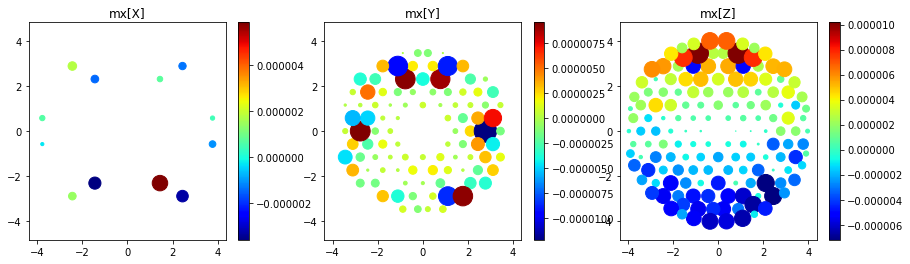

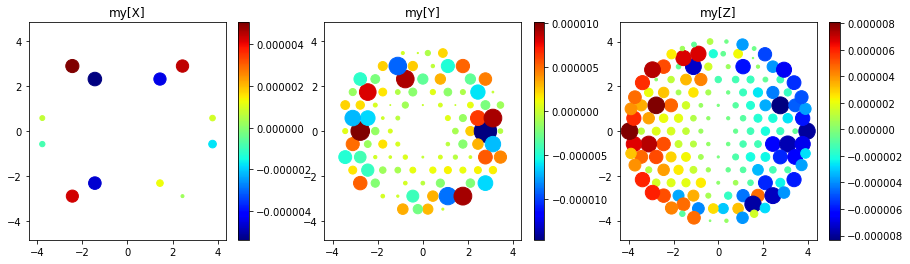

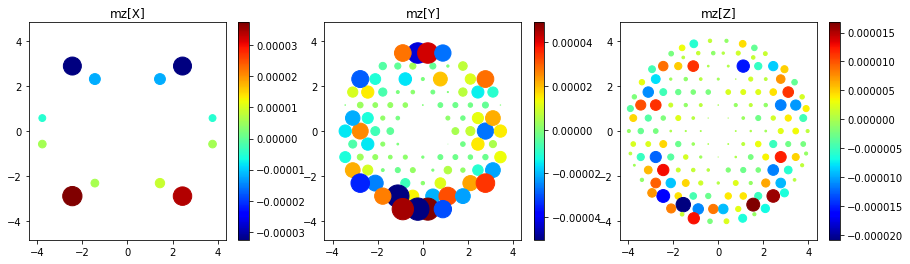

In [93]:
ll = ['fx','fy','fz','mx','my','mz']
for i,ff in enumerate([fx, fy, fz, mx, my, mz]):
    scaleF = 5e2/np.max(abs(np.array(ff)[:,1:]))
    fig, ax = plt.subplots(1,3, figsize=(15,4))
    img = ax[0].scatter(xact, yact, abs(ff['X'])*scaleF, ff['X'])
    fig.colorbar(img, ax=ax[0])
    ax[0].axis('equal')
    img = ax[1].scatter(xact, yact, abs(ff['Y'])*scaleF, ff['Y'])
    fig.colorbar(img, ax=ax[1])
    ax[1].axis('equal')
    img = ax[2].scatter(xact, yact, abs(ff['Z'])*scaleF, ff['Z'])
    fig.colorbar(img, ax=ax[2])
    ax[2].axis('equal')
    ax[0].set_title('%s[X]'%ll[i])
    ax[1].set_title('%s[Y]'%ll[i])
    ax[2].set_title('%s[Z]'%ll[i])
    print('%s, sum_x = %+.2f, sum_y = %+.2f, sum_z = %+.2f'%(ll[i], sum(ff['X']), sum(ff['Y']), sum(ff['Z'])), 
          end = '   ')
    mmx = sum(ff['Z']*yact)
    mmy = -sum(ff['Z']*xact)
    mmz = -sum(ff['X']*yact) + sum(ff['Y']*xact)
    print('mx = %+.2f, my=%+.2f, mz=%+.2f'%(mmx, mmy, mmz))